In [ ]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
gem_df=pd.read_excel('/content/Empires___Puzzles_Non-Paying.xlsx')
gem_df

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


,Date,Day,Session,Video #,Videolink,Videolength,Timestamp,Timelink,Player Level,Stronghold Level,...,Level,Rarity,Stage2,Provimce,Stage,Result,Gems,Gems+,Gems-,Gems Balance
0,2020-10-14,1,1,1.1,https://youtu.be/fee6_4ikGMw?list=PLTjhk5BwsiV...,01:02:17,00:00:00,00:00:00,1.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
1,2020-10-14,1,1,1.1,https://youtu.be/fee6_4ikGMw?list=PLTjhk5BwsiV...,01:02:17,00:00:21,00:00:21,1.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
2,2020-10-14,1,1,1.1,https://youtu.be/fee6_4ikGMw?list=PLTjhk5BwsiV...,01:02:17,00:00:21,00:00:21,1.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
3,2020-10-14,1,1,1.1,https://youtu.be/fee6_4ikGMw?list=PLTjhk5BwsiV...,01:02:17,00:00:35,00:00:35,1.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
4,2020-10-14,1,1,1.1,https://youtu.be/fee6_4ikGMw?list=PLTjhk5BwsiV...,01:02:17,00:00:37,00:00:37,1.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8452,2020-10-27,14,41,41.0,https://youtu.be/4es6yKmfxlw?list=PLTjhk5BwsiV...,00:37:35,00:37:09,00:37:09,14.0,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,79
8453,2020-10-27,14,41,41.0,https://youtu.be/4es6yKmfxlw?list=PLTjhk5BwsiV...,00:37:35,00:37:12,00:37:12,14.0,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,79
8454,2020-10-27,14,41,41.0,https://youtu.be/4es6yKmfxlw?list=PLTjhk5BwsiV...,00:37:35,00:37:28,00:37:28,14.0,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,79
8455,2020-10-27,14,41,41.0,https://youtu.be/4es6yKmfxlw?list=PLTjhk5BwsiV...,00:37:35,00:37:33,00:37:33,14.0,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,79


In [ ]:
#датафрейм со статистикой гемов у не платящего пользователя
gem_df_final=gem_df[['Day', 'Action', 'Tag', 'Gems+']]
gem_df_final=gem_df_final.loc[(gem_df_final['Gems+']>0)]
gem_df_final2=gem_df_final.groupby(['Day']).sum('Gems+')
gem_df_final2

,Gems+
Day,
1,171
2,34
3,30
4,32
5,23
6,30
7,30
8,19
9,9


In [ ]:
#тест на нормальное распределние
import scipy
stat, p = scipy.stats.shapiro(gem_df_final2) # тест Шапиро-Уилк
print('Statistics=%.3f, p-value=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Принять гипотезу о нормальности')
else:
    print('Отклонить гипотезу о нормальности')

Statistics=0.024, p-value=0.000
Отклонить гипотезу о нормальности


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
stat, p = scipy.stats.normaltest(gem_df_final2) # Критерий согласия Пирсона
print('Statistics=%.3f, p-value=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Принять гипотезу о нормальности')
else:
    print('Отклонить гипотезу о нормальности')

Statistics=29.482, p-value=0.000
Отклонить гипотезу о нормальности


/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [ ]:
gem_df_final2.describe()

,Gems+
count,14.000000
mean,42.071429
std,39.701704
min,9.000000
25%,28.250000
50%,30.000000
75%,37.750000
max,171.000000


<function matplotlib.pyplot.show(close=None, block=None)>

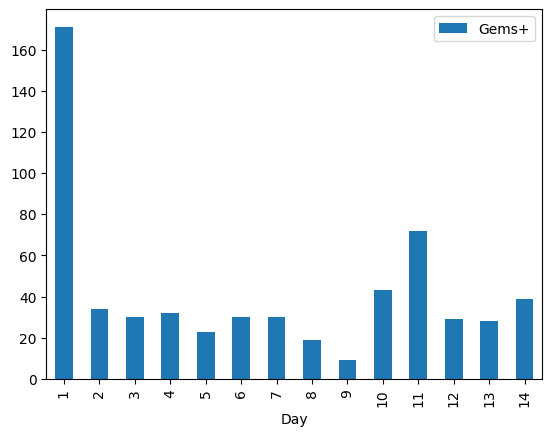

In [ ]:
gem_df_final2.plot(kind='bar')
plt.show

In [ ]:
#датафрейм для демонстрации откуда не платящий пользователь получал гемы
gem_df_final=gem_df[['Day', 'Action', 'Tag', 'Gems+']]
gem_df_final=gem_df_final.loc[(gem_df_final['Gems+']>0)]
gem_df_final3=gem_df_final.groupby(['Tag']).sum('Gems+')
gem_df_final3.drop('Day', axis=1, inplace=True)
gem_df_final3

,Gems+
Tag,
Alliance,15
Alliance Wars,3
Base,100
Mail,30
Missions,210
Mystic Vision,34
Path of Valor,50
Player,130
Quests,17


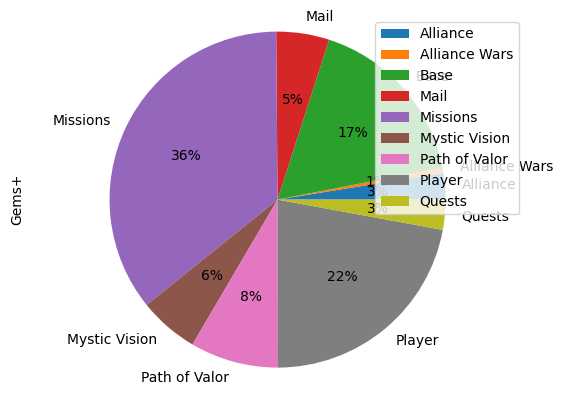

In [ ]:
gem_df_final3=gem_df_final.groupby(['Tag']).sum('Gems+').plot(kind='pie', y='Gems+', autopct='%1.0f%%')
plt.axis('equal')
plt.legend(loc='upper right')
plt.show()

In [ ]:
gems_neg_balance=gem_df[['Day', 'Action', 'Tag', 'Gems-']]
gems_neg_balance=gems_neg_balance.loc[(gems_neg_balance['Gems-']<0)]
gems_neg_balance=gems_neg_balance.groupby(['Tag']).sum('Gems-')
gems_neg_balance[['Gems-']]=abs(gems_neg_balance[['Gems-']])
gems_neg_balance.drop('Day', axis=1, inplace=True)
gems_neg_balance

,Gems-
Tag,
Building,11
Buy,82
Summon,350
Train,67


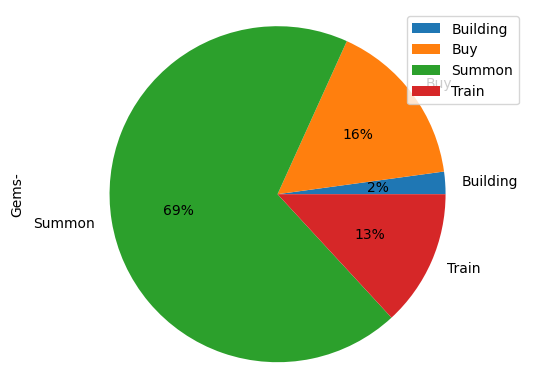

In [ ]:
gems_neg_balance=gems_neg_balance.groupby(['Tag']).sum('Gems-').plot(kind='pie', y='Gems-', autopct='%1.0f%%')
plt.axis('equal')
plt.legend(loc='upper right')
plt.show()

In [ ]:
anotherone_df=gem_df[['Day', 'Stronghold Level', 'Player Level']]
anotherone_df.drop_duplicates(keep=False)
anotherone_df

,Day,Stronghold Level,Player Level
0,1,1,1.0
1,1,1,1.0
2,1,1,1.0
3,1,1,1.0
4,1,1,1.0
...,...,...,...
8452,14,8,14.0
8453,14,8,14.0
8454,14,8,14.0
8455,14,8,14.0


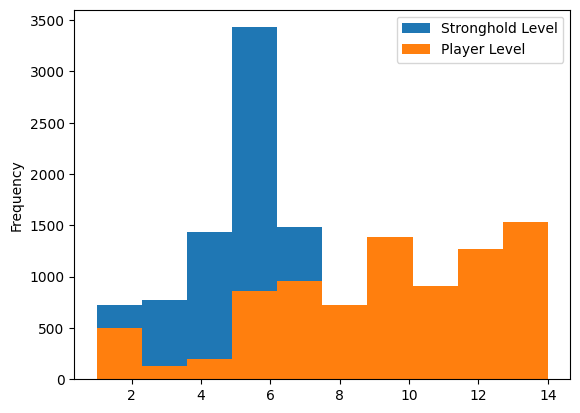

In [ ]:
anotherone_df.plot(kind='hist', x='Day')
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
gem_df2=pd.read_excel('/content/Empires___Puzzles_Whale.xlsx')
gem_df2

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


,Date,Day,Session,Video #,Videolink,Videolength,Timestamp,Timelink,Player Level,Stronghold Level,...,Team Power,Name,Level,Rarity,Stage,Result,Gems,Gems+,Gems-,Gems Balance
0,2020-10-27,1,1,1.1,https://youtu.be/orua1CzWdZU?list=PLTjhk5BwsiV...,00:32:35,00:00:00,NaN,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
1,2020-10-27,1,1,1.1,https://youtu.be/orua1CzWdZU?list=PLTjhk5BwsiV...,00:32:35,00:00:12,NaN,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
2,2020-10-27,1,1,1.1,https://youtu.be/orua1CzWdZU?list=PLTjhk5BwsiV...,00:32:35,00:00:15,NaN,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
3,2020-10-27,1,1,1.1,https://youtu.be/orua1CzWdZU?list=PLTjhk5BwsiV...,00:32:35,00:00:25,NaN,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
4,2020-10-27,1,1,1.1,https://youtu.be/orua1CzWdZU?list=PLTjhk5BwsiV...,00:32:35,00:00:26,NaN,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10375,2020-11-09,14,35,35.0,https://youtu.be/F2icJ76nVas?list=PLTjhk5BwsiV...,00:37:04,00:36:09,NaN,19,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,208
10376,2020-11-09,14,35,35.0,https://youtu.be/F2icJ76nVas?list=PLTjhk5BwsiV...,00:37:04,00:36:12,NaN,19,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,208
10377,2020-11-09,14,35,35.0,https://youtu.be/F2icJ76nVas?list=PLTjhk5BwsiV...,00:37:04,00:36:37,NaN,19,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,208
10378,2020-11-09,14,35,35.0,https://youtu.be/F2icJ76nVas?list=PLTjhk5BwsiV...,00:37:04,00:36:46,NaN,19,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,208


In [ ]:
gem_df22=gem_df2[['Day', 'Action', 'Tag', 'Gems+']]
gem_df22=gem_df22.loc[(gem_df2['Gems+']>0)]
gem_df2_new=gem_df22.groupby(['Day']).sum('Gems+')
gem_df2_new

,Gems+
Day,
1,3632
2,10103
3,2877
4,2359
5,10205
6,80
7,8092
8,10252
9,37


In [ ]:
#тест на нормальное распределние
import scipy
import scipy.stats as stats
stat, p = scipy.stats.shapiro(gem_df2_new) # тест Шапиро-Уилк
print('Statistics=%.3f, p-value=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Принять гипотезу о нормальности')
else:
    print('Отклонить гипотезу о нормальности')

Statistics=0.892, p-value=0.087
Принять гипотезу о нормальности


In [ ]:
stat, p = scipy.stats.normaltest(gem_df2_new) # Критерий согласия Пирсона
print('Statistics=%.3f, p-value=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Принять гипотезу о нормальности')
else:
    print('Отклонить гипотезу о нормальности')

Statistics=1.480, p-value=0.477
Принять гипотезу о нормальности


/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [ ]:
#Новый вариант стат.значимости. Т-тест Стьюдента
data_group_1=gem_df_final2[['Gems+']]
data_group_2=gem_df2_new[['Gems+']]
stats.ttest_ind(a=data_group_1, b=data_group_2, equal_var=True)

Ttest_indResult(statistic=array([-3.96153187]), pvalue=array([0.0005168]))

In [ ]:
#Поскольку датафрейм с метрикой гемс+ у неплатящего пользователя на проверку не прошёл, следует выполнить критерий манна-уитни
import scipy.stats as stats
stats. mannwhitneyu (data_group_1, data_group_2, alternative='two-sided')

MannwhitneyuResult(statistic=array([9.]), pvalue=array([4.72970254e-05]))

In [ ]:
gem_df2_new.describe()

,Gems+
count,14.000000
mean,5119.214286
std,4795.184944
min,37.000000
25%,649.750000
50%,3593.000000
75%,9600.250000
max,14759.000000


<function matplotlib.pyplot.show(close=None, block=None)>

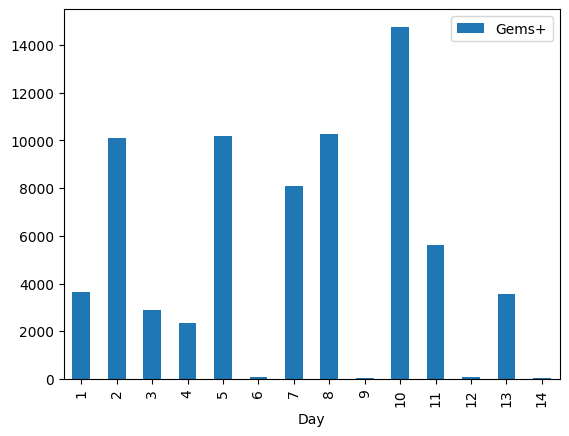

In [ ]:
gem_df2_new.plot(kind='bar')
plt.show

In [ ]:
#сделать круговую диаграмму для отображения способов добычи гемов у платящего пользователя
gem_df22=gem_df2[['Day', 'Action', 'Tag', 'Gems+']]
gem_df22=gem_df22.loc[(gem_df2['Gems+']>0)]
gem_df2_fnl=gem_df22.groupby(['Tag']).sum('Gems+')
gem_df2_fnl.drop('Day', axis=1, inplace=True)
gem_df2_fnl

,Gems+
Tag,
Alliance,25
Alliance Wars,4
Base,100
Mail,30
Missions,286
Mystic Vision,24
Path of Valor,550
Player,180
Purchase,70050


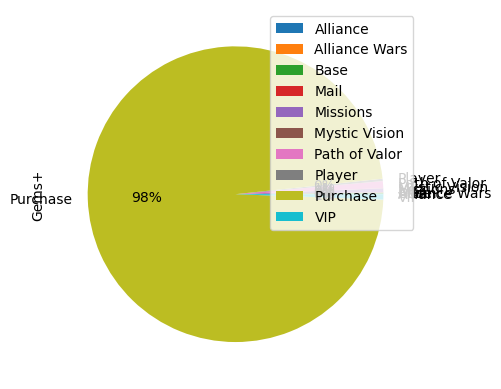

In [ ]:
gem_df2_fnl=gem_df22.groupby(['Tag']).sum('Gems+').plot(kind='pie', y='Gems+', autopct='%1.0f%%')
#plt.axis('equal')
plt.legend(loc='upper right')
plt.show()

In [ ]:
gems_neg_balance_whale=gem_df2[['Day', 'Action', 'Tag', 'Gems-']]
gems_neg_balance_whale=gems_neg_balance_whale.loc[(gems_neg_balance_whale['Gems-']<0)]
gems_neg_balance_whale=gems_neg_balance_whale.groupby(['Tag']).sum('Gems-')
gems_neg_balance_whale[['Gems-']]=abs(gems_neg_balance_whale[['Gems-']])
gems_neg_balance_whale.drop('Day', axis=1, inplace=True)
gems_neg_balance_whale

,Gems-
Tag,
Building,1898
Buy,450
Buy bi,7550
Buy bundle,6600
Buy res,900
Buy res f,4743
Buy res i,4179
Craft,112
Event,225


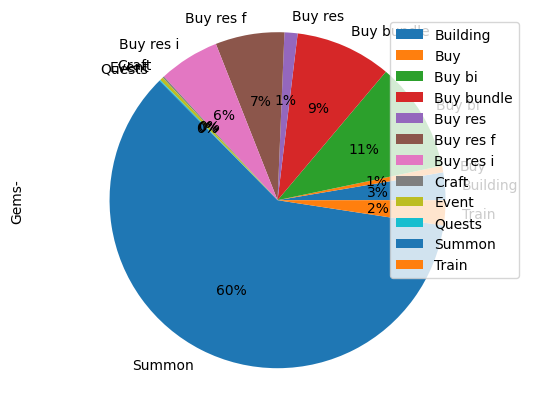

In [ ]:
gems_neg_balance_whale=gems_neg_balance_whale.groupby(['Tag']).sum('Gems-').plot(kind='pie', y='Gems-', autopct='%1.0f%%')
plt.axis('equal')
plt.legend(loc='upper right')
plt.show()

In [ ]:
moreanotherone_df=gem_df2[['Day', 'Stronghold Level', 'Player Level']]
moreanotherone_df.drop_duplicates(keep=False)
moreanotherone_df

,Day,Stronghold Level,Player Level
0,1,1,1
1,1,1,1
2,1,1,1
3,1,1,1
4,1,1,1
...,...,...,...
10375,14,11,19
10376,14,11,19
10377,14,11,19
10378,14,11,19


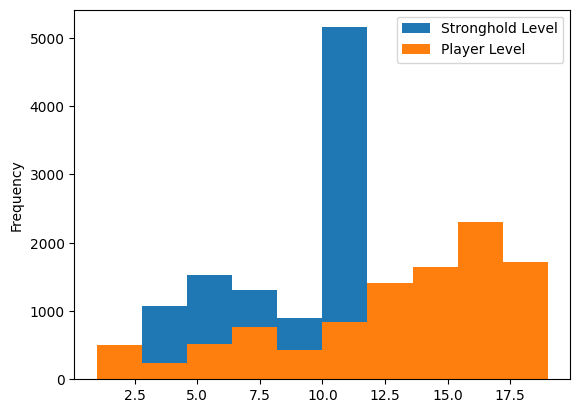

In [ ]:
moreanotherone_df.plot(kind='hist', x='Day')
plt.show()